In [1]:
#get all the good packages

import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sm

In [7]:
#FISHER EXACT TEST SECTION

#read the data
df = pd.read_csv("/Users/anni/Downloads/Cardiac Surgery Analysis for Andrew/cardiac_surgery.csv")
df

,Date of Surgery,Year,Month,Discharge Date,Discharge to,Gender,Age at operation,Weight,Height,BMI,...,Multi-system failure,Mortality Post Discharge,Mortality Date,Mortality Location,Mortality: Primary Cause,Mortality: Subsequent cause,Readmitted &lt;= to 30 days from surgery,Reason for Readmission,Mortality within 30 days of surgery,EuroSCORE II
0,23-Jan-19,2019,Jan,31-Jan-19,Local or referring hospital,Male,69,74.6,165,27.4,...,No,No,NaN,NaN,NaN,NaN,No,NaN,NaN,2.02
1,18-Jan-19,2019,Jan,23-Jan-19,Home,Female,62,61.0,162,23.2,...,No,No,NaN,NaN,NaN,NaN,No,NaN,NaN,1.19
2,28-Jan-19,2019,Jan,03-Feb-19,Home,Male,74,80.0,169,28.0,...,No,No,NaN,NaN,NaN,NaN,No,NaN,NaN,1.72
3,14-Feb-19,2019,Feb,21-Feb-19,Local or referring hospital,Male,66,59.0,165,21.7,...,No,No,NaN,NaN,NaN,NaN,No,NaN,NaN,6.94
4,14-Feb-19,2019,Feb,21-Feb-19,Home,Female,59,77.0,160,30.1,...,No,No,NaN,NaN,NaN,NaN,No,NaN,NaN,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,16-Dec-20,2020,Dec,23-Dec-20,Home,Female,75,68.0,156,27.9,...,No,No,NaN,NaN,NaN,NaN,No,NaN,NaN,2.95
967,20-Dec-20,2020,Dec,31-Dec-20,Local or referring hospital,Male,77,90.0,178,28.4,...,No,No,NaN,NaN,NaN,NaN,No,NaN,NaN,2.17
968,22-Dec-20,2020,Dec,30-Dec-20,Home,Female,74,85.0,157,34.5,...,NaN,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
969,29-Dec-20,2020,Dec,07-Jan-21,Home,Female,63,89.0,175,29.1,...,NaN,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN


In [16]:

#Add the lockdown periods
period = []
for row in df['Month']:
    if row == "Mar": period.append("Lockdown")
    elif row == "Apr": period.append("Lockdown")
    elif row == "Jan": period.append("Neither")
    elif row == "Feb": period.append("Neither")
    else: period.append("Post_Lockdown")
        
df["Period"] = period

#create a dataframe for the lockdown period comparison (Mar-Apr)
sample_lockdown_comparison = df[df['Period'] == "Lockdown"]
sample_lockdown_comparison = sample_lockdown_comparison[["Year", "Euroscore II Urgency", "Month"]]
sample_lockdown_comparison.head()

#create a dataframe for the postlockdown period comparison (May-Dec)

sample_postlockdown_comparison = df[df['Period'] == "Post_Lockdown"]
sample_postlockdown_comparison = sample_postlockdown_comparison[["Year", "Euroscore II Urgency", "Month"]]
sample_postlockdown_comparison.head()

#make a crosstab matrix to view the breakdown of the lockdown period
crosstab_lockdown = pd.crosstab(sample_lockdown_comparison['Year'], sample_lockdown_comparison['Euroscore II Urgency'])
crosstab_lockdown

#make a crosstab matrix to view the breakdown of the postlockdown period
crosstab_postlockdown = pd.crosstab(sample_postlockdown_comparison['Year'], sample_postlockdown_comparison['Euroscore II Urgency'])
crosstab_postlockdown

#convert the lockdown counts to percentages
crosstab_lockdown_percent = crosstab_lockdown.apply(lambda r:r/r.sum()*100,axis=1)
crosstab_lockdown_percent

#convert the postlockdown counts to percentages
crosstab_postlockdown_percent = crosstab_postlockdown.apply(lambda r:r/r.sum()*100,axis=1)
crosstab_postlockdown_percent

#do a fisher exact to see if the lockdown breakdown is different
lockdown_oddsratio, lockdown_pvalue = sm.fisher_exact(crosstab_lockdown)

#do a fisher exact to see if the post lockdown breakdown is different
postlockdown_oddsratio, postlockdown_pvalue = sm.fisher_exact(crosstab_postlockdown)

#print lockdown results
if lockdown_pvalue < 0.05:
    print ("The lockdown comparison difference is statistically significant with a pvalue of", "%.5f" % lockdown_pvalue) 
else:
    print ("The lockdown comparison difference is not statistically significant with a pvalue of", "%.5f" % lockdown_pvalue)

#print post lockdown results
if postlockdown_pvalue < 0.05:
    print ("The post lockdown comparison difference is statistically significant with a pvalue of", "%.5f" % postlockdown_pvalue) 
else:
    print ("The post lockdown comparison difference is not statistically significant with a pvalue of", "%.5f" % postlockdown_pvalue)

    
  

The lockdown comparison difference is not statistically significant with a pvalue of 0.09261
The post lockdown comparison difference is not statistically significant with a pvalue of 0.06072


Euroscore II Urgency,Acute,Elective
Year,,
2019,16.393443,83.606557
2020,22.349570,77.650430


Boxplot of Acute Surgery


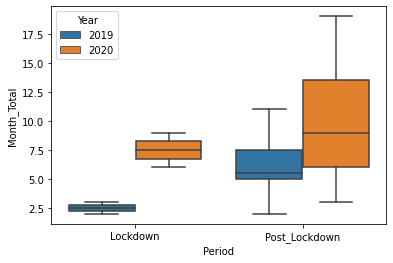

In [19]:
#BOXPLOT VISUALISATION SECTION

#hash all of this shit because you cannot make a fucking boxplot out of it but unhash it if you want a pretty grouped table
#lockdown_grouped_table = sample_lockdown_comparison.groupby(by = ["Euroscore II Urgency","Month","Year"]).size().unstack()
#lockdown_grouped_table

#make a table of data for the boxplot
grouped_set = df[df['Period']!= "Neither"]
grouped_set = grouped_set[["Year", "Euroscore II Urgency", "Month", "Period"]]
grouped_set["Month_Total"] = grouped_set.groupby(["Month", "Euroscore II Urgency", "Year"])["Month"].transform('count')
grouped_set = grouped_set.drop_duplicates()
grouped_set

grouped_set_acute =grouped_set[grouped_set["Euroscore II Urgency"] == "Acute"]
grouped_set_acute

grouped_set_elective = grouped_set[grouped_set["Euroscore II Urgency"]=="Elective"]

#Make boxplots for acute surgeries in lockdown
print("Boxplot of Acute Surgery")
ax = sns.boxplot(data=grouped_set_acute, x="Period", y="Month_Total", hue="Year")


Boxplot of Elective Surgery


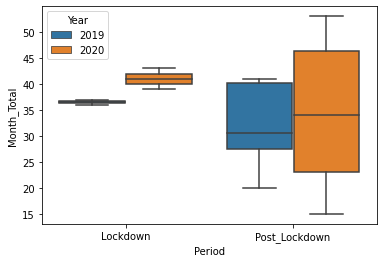

In [5]:
#Make boxplots for elective surgeries in lockdown
print("Boxplot of Elective Surgery")
ax = sns.boxplot(data=grouped_set_elective, x="Period", y="Month_Total", hue="Year")


In [25]:
#DIFFERENCE IN MEANS CALCULATION SECTION

import pingouin as pg

#calculate difference in means for acute surgery in and out of lockdown
acute_lockdown_2019 = grouped_set_acute[(grouped_set_acute["Year"]==2019) & (grouped_set_acute["Period"]=="Lockdown")].Month_Total
acute_lockdown_2020 = grouped_set_acute[(grouped_set_acute["Year"]==2020) & (grouped_set_acute["Period"]=="Lockdown")].Month_Total

lockdown_acute_difference_summary = pg.ttest(x=acute_lockdown_2020, y=acute_lockdown_2019)
print('Summary Difference of Means for Acute Surgery in Lockdown Period')
lockdown_acute_difference_summary

Summary Difference of Means for Acute Surgery in Lockdown Period


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.162278,2,two-sided,0.087129,"[-1.8, 11.8]",3.162278,1.622,0.416548


In [7]:
#calculate difference in means for elective surgery in and out of lockdown
elective_lockdown_2019 = grouped_set_elective[(grouped_set_elective["Year"]==2019) & (grouped_set_elective["Period"]=="Lockdown")].Month_Total
elective_lockdown_2020 = grouped_set_elective[(grouped_set_elective["Year"]==2020) & (grouped_set_elective["Period"]=="Lockdown")].Month_Total

lockdown_elective_difference_summary = pg.ttest(x=elective_lockdown_2020, y=elective_lockdown_2019)
print('Summary Difference of Means for Elective Surgery in Lockdown Period')
lockdown_elective_difference_summary


Summary Difference of Means for Elective Surgery in Lockdown Period


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.182821,2,two-sided,0.160746,"[-4.37, 13.37]",2.182821,1.22,0.246912


In [8]:
#calculate difference in means for total surgery in and out of lockdown
lockdown_2019 = grouped_set[(grouped_set["Year"]==2019) & (grouped_set["Period"]=="Lockdown")].Month_Total
lockdown_2020 = grouped_set[(grouped_set["Year"]==2020) & (grouped_set["Period"]=="Lockdown")].Month_Total

lockdown_total_difference_summary = pg.ttest(x=lockdown_2020, y=lockdown_2019)
print('Summary Difference of Means for Total Surgery in Lockdown Period')
lockdown_total_difference_summary


Summary Difference of Means for Total Surgery in Lockdown Period


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.343717,6,two-sided,0.742784,"[-29.07, 38.57]",0.243044,0.542,0.059862


In [9]:
#calculate difference in means for acute surgery in and out of postlockdown
acute_postlockdown_2019 = grouped_set_acute[(grouped_set_acute["Year"]==2019) & (grouped_set_acute["Period"]=="Post_Lockdown")].Month_Total
acute_postlockdown_2020 = grouped_set_acute[(grouped_set_acute["Year"]==2020) & (grouped_set_acute["Period"]=="Post_Lockdown")].Month_Total

postlockdown_acute_difference_summary = pg.ttest(x=acute_postlockdown_2020, y=acute_postlockdown_2019)
print('Summary Difference of Means for Acute Surgery in Post Lockdown Period')
postlockdown_acute_difference_summary


Summary Difference of Means for Acute Surgery in Post Lockdown Period


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.56805,14,two-sided,0.139189,"[-1.29, 8.29]",0.784025,0.943,0.309293


In [10]:
#calculate difference in means for elective surgery in and out of postlockdown
elective_postlockdown_2019 = grouped_set_elective[(grouped_set_elective["Year"]==2019) & (grouped_set_elective["Period"]=="Post_Lockdown")].Month_Total
elective_postlockdown_2020 = grouped_set_elective[(grouped_set_elective["Year"]==2020) & (grouped_set_elective["Period"]=="Post_Lockdown")].Month_Total

postlockdown_elective_difference_summary = pg.ttest(x=elective_postlockdown_2020, y=elective_postlockdown_2019)
print('Summary Difference of Means for Elective Surgery in Post Lockdown Period')
postlockdown_elective_difference_summary


Summary Difference of Means for Elective Surgery in Post Lockdown Period


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.339647,14,two-sided,0.739164,"[-10.63, 14.63]",0.169823,0.445,0.061589


In [11]:
#calculate difference in means for total surgery in and out of postlockdown
postlockdown_2019 = grouped_set[(grouped_set["Year"]==2019) & (grouped_set["Period"]=="Post_Lockdown")].Month_Total
postlockdown_2020 = grouped_set[(grouped_set["Year"]==2020) & (grouped_set["Period"]=="Post_Lockdown")].Month_Total

postlockdown_total_difference_summary = pg.ttest(x=postlockdown_2020, y=postlockdown_2019)
print('Summary Difference of Means for Total Surgery in Post Lockdown Period')
postlockdown_total_difference_summary


Summary Difference of Means for Total Surgery in Post Lockdown Period


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.50294,30,two-sided,0.618679,"[-8.42, 13.92]",0.177816,0.371,0.077587


In [23]:
#Save the cleaned data to a supplementary file
cleaned_supplementary_data_file = df.groupby(by = ["Euroscore II Urgency","Month","Year"]).size().unstack()

cleaned_supplementary_data_file.to_csv(r"/Users/anni/Downloads/cardiac_surgery_cleaned_supplementary_file.csv")

cleaned_supplementary_data_file

Year                        2019  2020
Euroscore II Urgency Month            
Acute                Apr       3     6
                     Aug       6     3
                     Dec      11    13
                     Feb       3     7
                     Jan       2     6
                     Jul       9     3
                     Jun       7     8
                     Mar       2     9
                     May       5     7
                     Nov       5    15
                     Oct       2    19
                     Sep       5    10
Elective             Apr      36    39
                     Aug      41    47
                     Dec      20    15
                     Feb      32    30
                     Jan      31    31
                     Jul      29    53
                     Jun      30    40
                     Mar      37    43
                     May      41    46
                     Nov      23    25
                     Oct      31    17
                     Sep      40    28